### **TP CLUSTERING**

---









# **0.Preparation**

**Import libraries**




In [1]:
! pip install hdbscan

In [1]:
from scipy.io import arff
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from scipy.io import arff
from os import listdir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hdbscan


**Import dataset**

In [ ]:
! git clone https://github.com/deric/clustering-benchmark

Cloning into 'clustering-benchmark'...
remote: Enumerating objects: 1522, done.
remote: Total 1522 (delta 0), reused 0 (delta 0), pack-reused 1522
Receiving objects: 100% (1522/1522), 23.87 MiB | 28.48 MiB/s, done.
Resolving deltas: 100% (545/545), done.


# **1.Jeux de données**


In [ ]:
path = '/content/clustering-benchmark/src/main/resources/datasets/artificial/'

In [ ]:
files=listdir(path)

data={}
x_data={}
y_data={}
label_data={}
errorfile=[]

for f in files:
    try:
        data[f]=arff.loadarff(open(path+f,'r'))
        x_data[f]=[]
        y_data[f]=[]
        label_data[f]=[]
        for c in data[f][0]:
            x_data[f].append(c[0])
            y_data[f].append(c[1])
            label_data[f].append(c[2])
    except Exception as e:
        print("ERROR "+f+" : "+str(e))
        errorfile.append(f)

print("\nfile(s) NOT in the dataset because of error(s) : "+str(errorfile)) 

ERROR s-set4.arff : invalid index (2)
ERROR mopsi-finland.arff : invalid index (2)
ERROR birch-rg2.arff : invalid index (2)
ERROR birch-rg1.arff : invalid index (2)
ERROR s-set3.arff : invalid index (2)
ERROR mopsi-joensuu.arff : invalid index (2)
ERROR birch-rg3.arff : invalid index (2)

file(s) NOT in the dataset because of error(s) : ['s-set4.arff', 'mopsi-finland.arff', 'birch-rg2.arff', 'birch-rg1.arff', 's-set3.arff', 'mopsi-joensuu.arff', 'birch-rg3.arff']


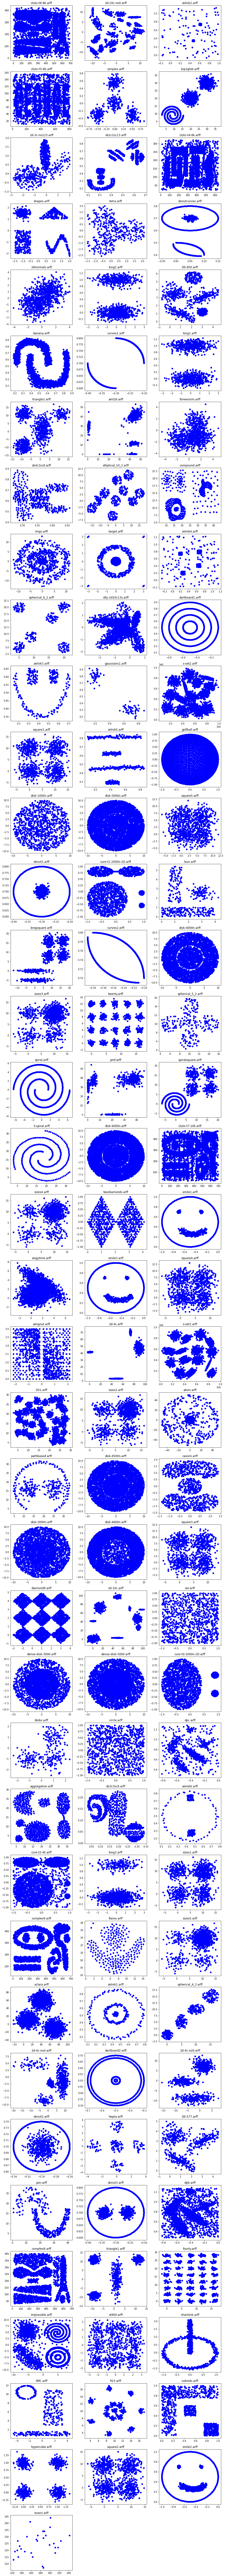

In [ ]:
n=len(files)-len(errorfile)
n=n//3+1
i=1

fig=plt.figure(figsize=(16,200))

for f in files:
    if f not in errorfile:
        ax=fig.add_subplot(n,3,i)
        i+=1
        ax.scatter(x_data[f],y_data[f],c='b')
        ax.set_title(f)
plt.show()

# **2.Clustering k-Means**

2.1)


In [ ]:
#FILES=['spherical_6_2.arff','2d-4c.arff','aml28.arff']
#CLUSTERS=[6,4,5]
FILES=['spherical_6_2.arff','2d-4c.arff','aml28.arff','square3.arff']
CLUSTERS=[6,4,5,4]
DATA={}
kmeans={}
LABELS={}
i=0
for f in FILES:
  DATA[f] = np.transpose(np.array([x_data[f],y_data[f]]))
  


  kmeans[f] = KMeans(n_clusters=CLUSTERS[i],init='k-means++').fit(DATA[f])
  i+=1
  LABELS[f]=kmeans[f].labels_





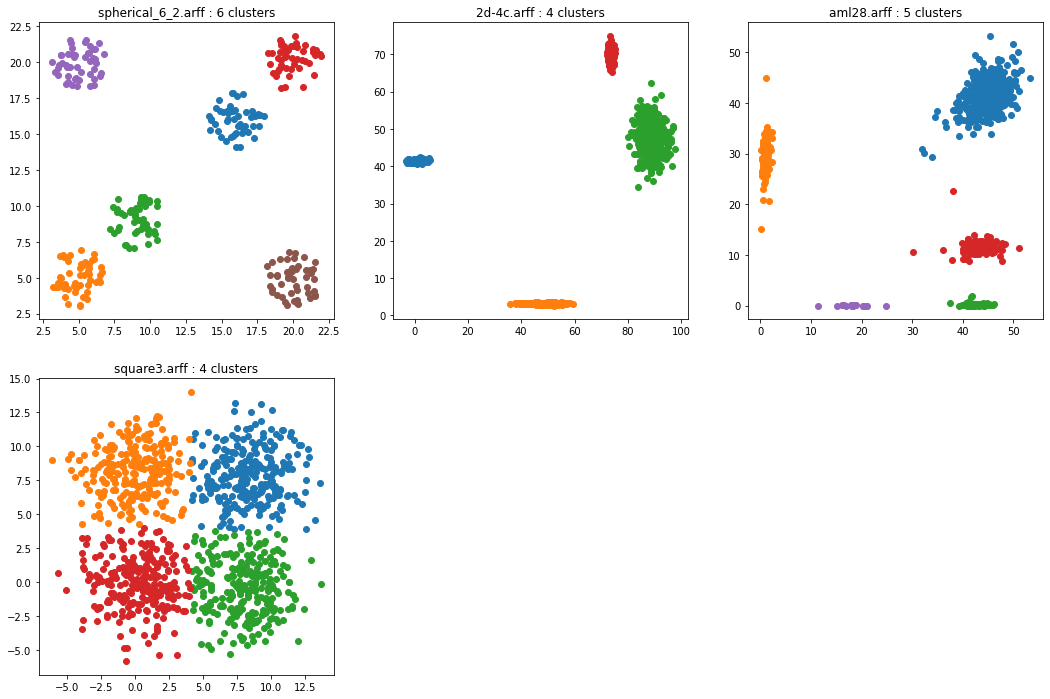

In [ ]:

color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

n=len(FILES)
n=n//3+1
i=1
nb=[]

fig=plt.figure(figsize=(18,6*n))

for f in FILES:
  ax=fig.add_subplot(n,3,i)
  i+=1

  lab={}
  for j in range(len(LABELS[f])):
      l=LABELS[f][j]
      if l not in lab:
          lab[l]=[[x_data[f][j]],[y_data[f][j]]]
      else:
          lab[l][0].append(x_data[f][j])
          lab[l][1].append(y_data[f][j])    
              
  k=0
  for lb in lab:
      ax.scatter(lab[lb][0],lab[lb][1],c=color[k%10])
      k+=1
  ax.set_title(f+" : "+str(len(lab))+" clusters")
plt.show()

In [ ]:
#adjust_rand_score
f='square3.arff'

DATA2=np.transpose(np.array([x_data[f],y_data[f]]))

sm1=-1
s=0
k=1
while s>=sm1:
  sm1=s
  kmeans2 = KMeans(n_clusters=k,init='k-means++').fit(DATA2)
  k+=1
  LABELS2=kmeans2.labels_
  label_true=np.array((label_data[f]),dtype=int)
  s=metrics.adjusted_rand_score(label_true, LABELS2)
  #print(s)

print(k-2)
  

4


In [ ]:
#silhouette_score
from time import *
from sklearn import metrics

f='square3.arff'
#metri=['cityblock','cosine','euclidean','haversine','l1','l2','manhattan','nan_euclidean']
metri =['euclidean']
DATA2=np.transpose(np.array([x_data[f],y_data[f]]))
RES={}
runtime={}

for m in metri:
  start=time()
  s=[]
  k_range = np.arange(2,11,1)
  for k in k_range:
    kmeans2 = KMeans(n_clusters=k,init='k-means++').fit(DATA2)
    LABELS2=kmeans2.labels_
    s.append(metrics.silhouette_score(DATA2, LABELS2, metric=m))
    #print(s)

  end=time()
  runtime[m] = end-start
  RES[m]=[s.index(max(s))+2,runtime[m]]
print(RES)
print(s)
print(runtime)


{'euclidean': [4, 0.9967746734619141]}
[0.40050380010873105, 0.4371443398786429, 0.5145931812534627, 0.4500742428562952, 0.38487366194089817, 0.3511999450162987, 0.32525576261808564, 0.32798617331113045, 0.3383951216257813]
{'euclidean': 0.9967746734619141}


In [ ]:
#davies_bouldin_score
from time import *
from sklearn import metrics

#f='spherical_6_2.arff'
f='square3.arff'

DATA2=np.transpose(np.array([x_data[f],y_data[f]]))
RES2={}

start=time()
s2=[]
for k in range (2,11):
  kmeans2 = KMeans(n_clusters=k,init='k-means++').fit(DATA2)
  LABELS2=kmeans2.labels_
  s2.append(metrics.davies_bouldin_score(DATA2, LABELS2))
  #print(s)

end=time()
runtime2 = end-start
RES2['euclidean']=[s2.index(min(s2))+2,runtime2]
print(RES2)

{'euclidean': [4, 0.6127452850341797]}


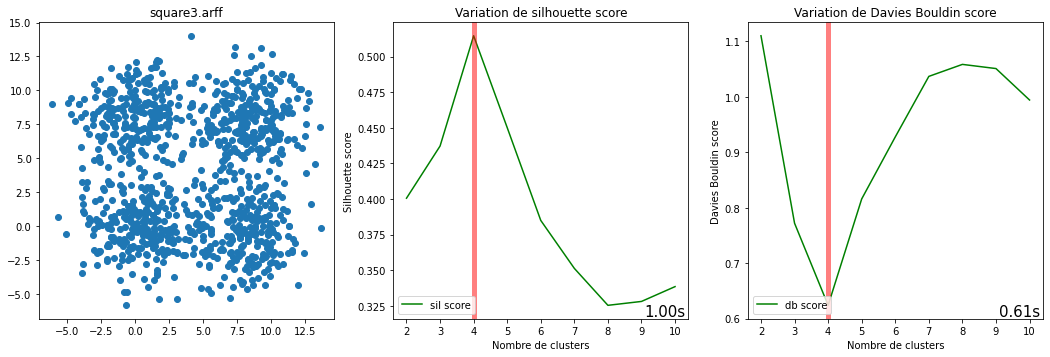

In [ ]:
plt.figure(figsize=(18,12))
ax1 = plt.subplot(2,3,1)
ax1.scatter(square3_df.iloc[:,0],square3_df.iloc[:,1])
ax1.set_title('square3.arff')
ax2 = plt.subplot(2,3,2)
ax2.plot(k_range, s,c='g',label='sil score')
ax2.set_ylabel('Silhouette score')
ax2.set_xlabel('Nombre de clusters')
ax2.set_title('Variation de silhouette score')
ax2.axvline(x=s.index(max(s))+2,linewidth=5,alpha=0.5,color='r')    
ax2.legend(loc=3)
ax2.text(.99,.01, ('%.2fs')%runtime['euclidean'],
                    transform = plt.gca().transAxes, size = 15,
                    horizontalalignment = 'right')
ax3 = plt.subplot(2,3,3)
ax3.plot(k_range, s2,c='g',label='db score')
ax3.set_ylabel('Davies Bouldin score')
ax3.set_xlabel('Nombre de clusters')
ax3.set_title('Variation de Davies Bouldin score')
ax3.axvline(x=s2.index(min(s2))+2,linewidth=5,alpha=0.5,color='r')    
ax3.legend(loc=3)
ax3.text(.99,.01, ('%.2fs')%runtime2,
                    transform = plt.gca().transAxes, size = 15,
                    horizontalalignment = 'right')
plt.show()


2.2)

In [ ]:
FILES=['3-spiral.arff','banana.arff','cluto-t4-8k.arff']
CLUSTERS=[3,2,7]
DATA={}
kmeans={}
LABELS={}
i=0
for f in FILES:
  DATA[f] = np.transpose(np.array([x_data[f],y_data[f]]))
  


  kmeans[f] = KMeans(n_clusters=CLUSTERS[i],init='k-means++').fit(DATA[f])
  i+=1
  LABELS[f]=kmeans[f].labels_

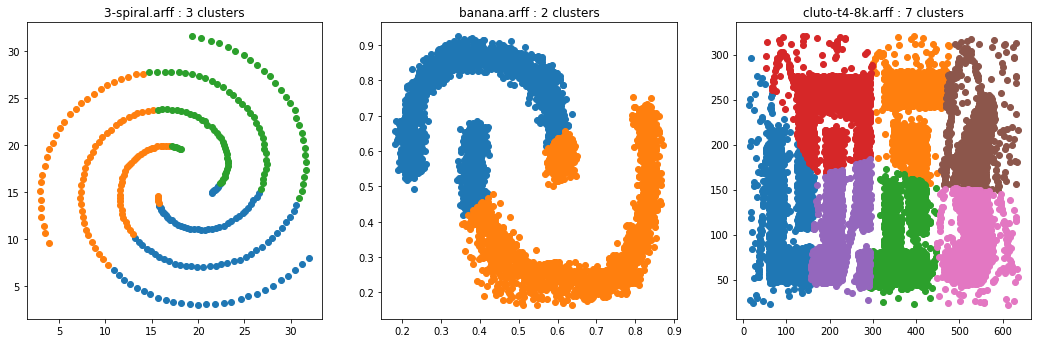

In [ ]:
color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

n=len(FILES)
n=n//3+1
i=1
nb=[]

fig=plt.figure(figsize=(18,6*n))

for f in FILES:
  ax=fig.add_subplot(n,3,i)
  i+=1

  lab={}
  for j in range(len(LABELS[f])):
      l=LABELS[f][j]
      if l not in lab:
          lab[l]=[[x_data[f][j]],[y_data[f][j]]]
      else:
          lab[l][0].append(x_data[f][j])
          lab[l][1].append(y_data[f][j])    
              
  k=0
  for lb in lab:
      ax.scatter(lab[lb][0],lab[lb][1],c=color[k%10])
      k+=1
  ax.set_title(f+" : "+str(len(lab))+" clusters")
plt.show()

# **3.Clustering Agglomératif**

3.1)

In [ ]:
FILES=['3-spiral.arff','aggregation.arff','2d-3c-no123.arff']
link=['single','complete','average','ward']
CLUSTERS=[3,7,3]
DATA={}
AC={}
LABELS={}
i=0
for f in FILES:
  DATA[f] = np.transpose(np.array([x_data[f],y_data[f]]))
  for li in link:
    AC[f+li] = AgglomerativeClustering(n_clusters=CLUSTERS[i],linkage=li,affinity='euclidean').fit(DATA[f])
    LABELS[f+li]=AC[f+li].labels_
  i+=1

print(AC)

{'3-spiral.arffsingle': AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=3), '3-spiral.arffcomplete': AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3), '3-spiral.arffaverage': AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3), '3-spiral.arffward': AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3), 'aggregation.arffsingle': AgglomerativeClustering(affinity='eucli

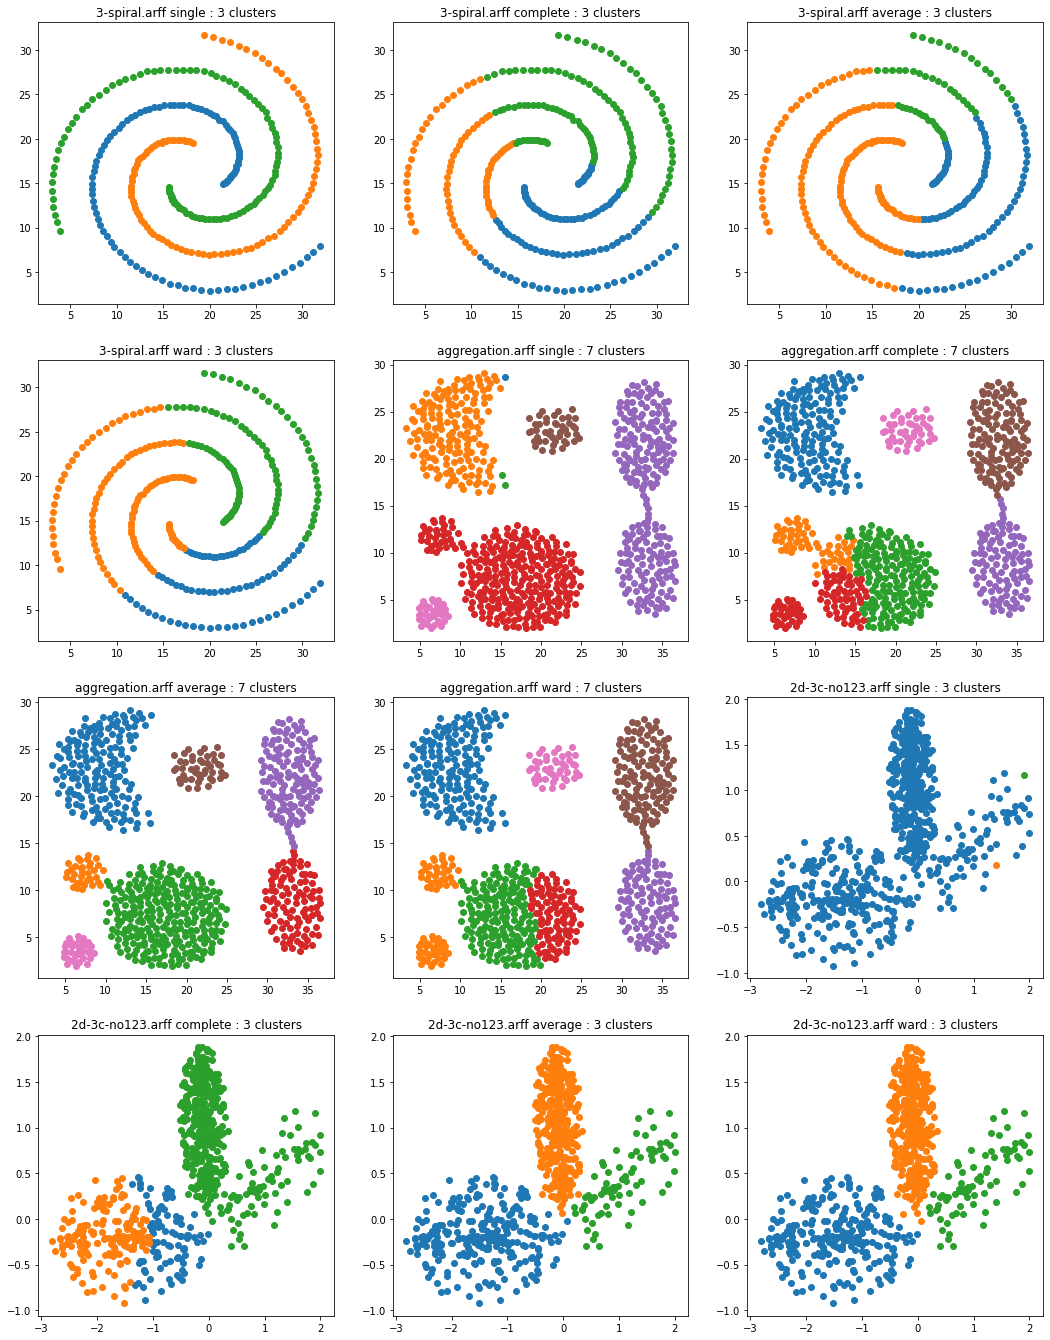

In [ ]:
color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

n=len(FILES)*len(link)
n=n//3+1
i=1
nb=[]

fig=plt.figure(figsize=(18,6*n))

for f in FILES:
  for li in link:
    ax=fig.add_subplot(n,3,i)
    i+=1

    lab={}
    for j in range(len(LABELS[f+li])):
        l=LABELS[f+li][j]
        if l not in lab:
            lab[l]=[[x_data[f][j]],[y_data[f][j]]]
        else:
            lab[l][0].append(x_data[f][j])
            lab[l][1].append(y_data[f][j])    
                
    k=0
    for lb in lab:
        ax.scatter(lab[lb][0],lab[lb][1],c=color[k%10])
        k+=1
    ax.set_title(f+" "+li+" : "+str(len(lab))+" clusters")
plt.show()

In [ ]:
#silhouette_score
from time import *
from sklearn import metrics

f='aggregation.arff'
metri=['cityblock','cosine','euclidean','haversine','l1','l2','manhattan','nan_euclidean']
DATA2=np.transpose(np.array([x_data[f],y_data[f]]))
RES={}
for m in metri:
  start=time()
  s=[]
  for k in range (2,11):
    AC2 = AgglomerativeClustering(n_clusters=k,linkage='average',affinity='euclidean').fit(DATA2)
    LABELS2=AC2.labels_
    s.append(metrics.silhouette_score(DATA2, LABELS2, metric=m))
    #print(s)

  end=time()
  RES[m]=[s.index(max(s))+2,end-start]
print(RES)

{'cityblock': [4, 0.15645956993103027], 'cosine': [3, 0.26238274574279785], 'euclidean': [4, 0.2858459949493408], 'haversine': [2, 1.196627140045166], 'l1': [4, 0.14843034744262695], 'l2': [4, 0.2824060916900635], 'manhattan': [4, 0.19267535209655762], 'nan_euclidean': [4, 0.42562317848205566]}


In [ ]:
#A TEST 

#davies_bouldin_score
from time import *
from sklearn import metrics

f='aggregation.arff'

DATA2=np.transpose(np.array([x_data[f],y_data[f]]))
RES={}

start=time()
s=[]
for k in range (2,11):
  AC2 = AgglomerativeClustering(n_clusters=k,linkage='average',affinity='euclidean').fit(DATA2)
  LABELS2=AC2.labels_
  s.append(metrics.davies_bouldin_score(DATA2, LABELS2))
  #print(s)

end=time()
RES['euclidean']=[s.index(min(s))+2,end-start]
print(RES)

[0.9181507394386348, 0.6735478937846615, 0.5967999344325035, 0.6823803339372123, 0.6132453256811243, 0.5036083603770679, 0.5728824027804555, 0.6840997433908089, 0.722707427344788]
{'euclidean': [7, 0.09754586219787598]}


3.2)

In [ ]:
FILES=['cluto-t4-8k.arff','2sp2glob.arff']
link=['single','complete','average','ward']
CLUSTERS=[7,4]
DATA={}
AC={}
LABELS={}
i=0
for f in FILES:
  DATA[f] = np.transpose(np.array([x_data[f],y_data[f]]))
  for li in link:
    
    


    AC[f+li] = AgglomerativeClustering(n_clusters=CLUSTERS[i],linkage=li,affinity='euclidean').fit(DATA[f])
    LABELS[f+li]=AC[f+li].labels_
  i+=1

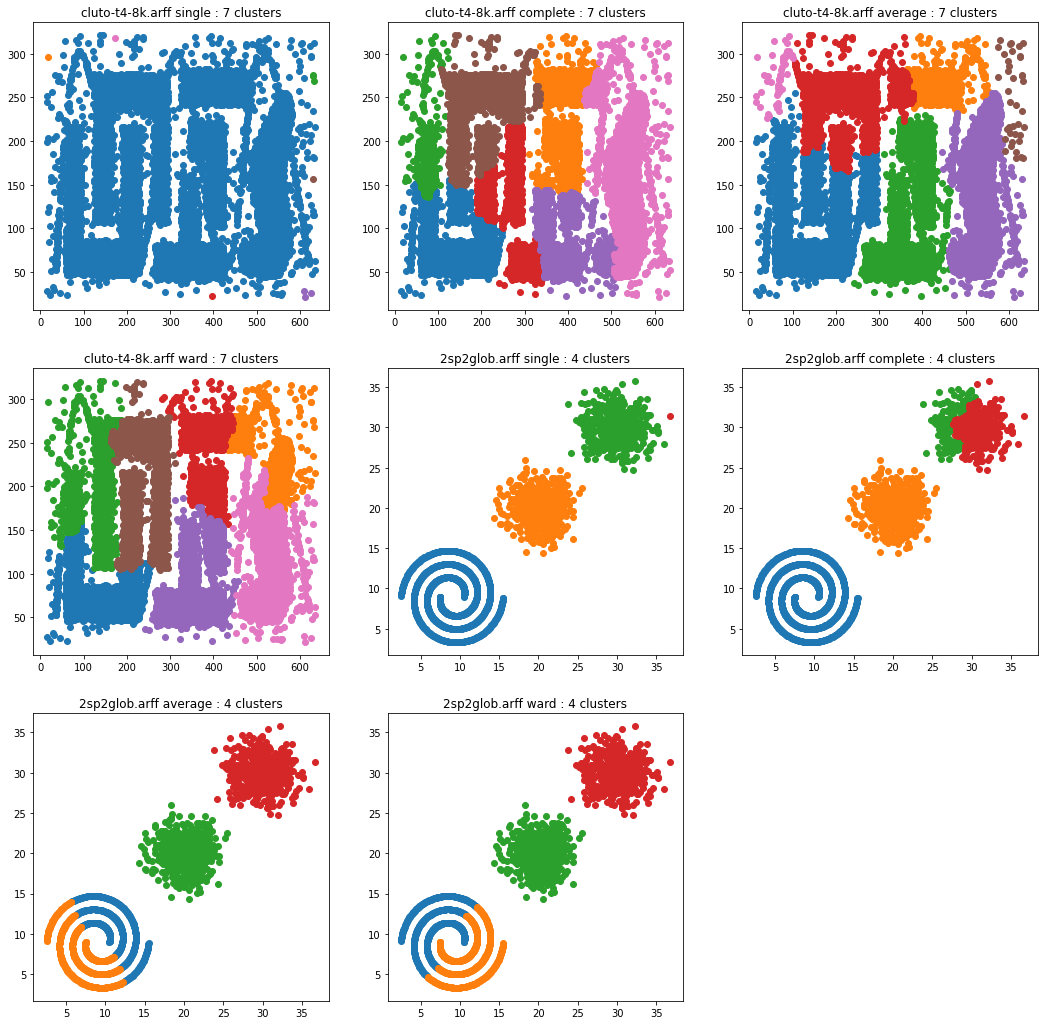

In [ ]:
color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

n=len(FILES)*len(link)
n=n//3+1
i=1
nb=[]

fig=plt.figure(figsize=(18,6*n))

for f in FILES:
  for li in link:
    ax=fig.add_subplot(n,3,i)
    i+=1

    lab={}
    for j in range(len(LABELS[f+li])):
        l=LABELS[f+li][j]
        if l not in lab:
            lab[l]=[[x_data[f][j]],[y_data[f][j]]]
        else:
            lab[l][0].append(x_data[f][j])
            lab[l][1].append(y_data[f][j])    
                
    k=0
    for lb in lab:
        ax.scatter(lab[lb][0],lab[lb][1],c=color[k%10])
        k+=1
    ax.set_title(f+" "+li+" : "+str(len(lab))+" clusters")
plt.show()

# **4.Clustering DBSCAN**

4.1)

In [ ]:
FILES=['cluto-t4-8k.arff','2sp2glob.arff']
#CLUSTERS=[]
para=[[5.2,4],[1.5,10]]
DATA={}
dbscan={}
LABELS={}
i=0
for f in FILES:
  DATA[f] = np.transpose(np.array([x_data[f],y_data[f]]))
  


  dbscan[f] = DBSCAN(eps=para[i][0],min_samples=para[i][1]).fit(DATA[f])
  i+=1
  LABELS[f]=dbscan[f].labels_




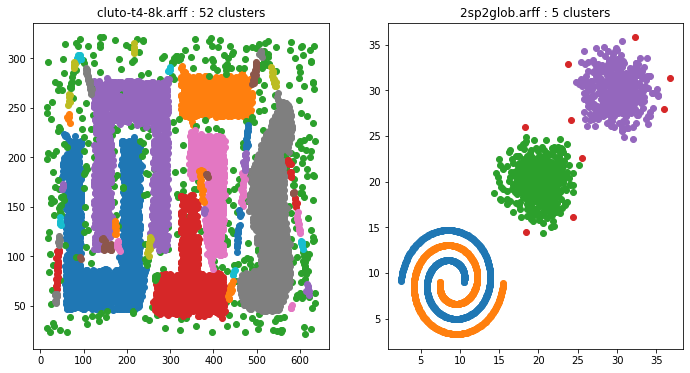

In [ ]:

color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

n=len(FILES)
n=n//3+1
i=1
nb=[]

fig=plt.figure(figsize=(18,6*n))

for f in FILES:
  ax=fig.add_subplot(n,3,i)
  i+=1

  lab={}
  for j in range(len(LABELS[f])):
      l=LABELS[f][j]
      if l not in lab:
          lab[l]=[[x_data[f][j]],[y_data[f][j]]]
      else:
          lab[l][0].append(x_data[f][j])
          lab[l][1].append(y_data[f][j])    
              
  k=0
  for lb in lab:
      ax.scatter(lab[lb][0],lab[lb][1],c=color[k%10])
      k+=1
  ax.set_title(f+" : "+str(len(lab))+" clusters")
plt.show()

In [ ]:
%%time

#adjust_rand_score
f='cluto-t4-8k.arff'

DATA2=np.transpose(np.array([x_data[f],y_data[f]]))
E=np.linspace(0.1,10,100)
S=np.linspace(0,20,21)
label_true=np.zeros((len(label_data[f])))
for l in range (0,len(label_data[f])):
  try:
    label_true[l]=int(label_data[f][l])
  except:
    label_true[l]=999

#label_true=np.array((label_data[f]),dtype=int)
SCORE=np.zeros((100,21))
best_e = None
best_s = None
sc=0
for e in E:
  for s in S:


    dbscan2 = DBSCAN(eps=e,min_samples=s).fit(DATA2)
    LABELS2=dbscan2.labels_

    SCORE[int((e-0.1)*10),int(s)]=metrics.adjusted_rand_score(label_true, LABELS2)
    if SCORE[int((e-0.1)*10),int(s)] > sc:
      sc=SCORE[int((e-0.1)*10),int(s)]
      best_e=e
      best_s=s
#print(s)

print(SCORE)
print("best e",best_e)
print("best s",best_s)
print("best score",sc)

[[ 3.45766740e-06  3.45766740e-06  1.07622777e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.38306121e-05  1.38306121e-05  4.84054356e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.70324171e-05  2.70324171e-05 -4.30153216e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 1.19159880e-02  1.19159880e-02  1.21218554e-02 ...  9.68942569e-01
   9.69103340e-01  9.69233183e-01]
 [ 1.16701584e-02  1.16701584e-02  1.18556986e-02 ...  9.65510918e-01
   9.68156914e-01  9.69422282e-01]
 [ 1.16702235e-02  1.16702235e-02  1.18460642e-02 ...  9.64599279e-01
   9.65998877e-01  9.67248078e-01]]
best e 8.4
best s 15.0
best score 0.9754875360534324
CPU times: user 1min 56s, sys: 87.8 ms, total: 1min 56s
Wall time: 1min 56s


In [ ]:
FILES=['cluto-t4-8k.arff']
#CLUSTERS=[]
para=[[best_e,best_s]]
DATA={}
dbscan={}
LABELS={}
i=0
for f in FILES:
  DATA[f] = np.transpose(np.array([x_data[f],y_data[f]]))
  


  dbscan[f] = DBSCAN(eps=para[i][0],min_samples=para[i][1]).fit(DATA[f])
  i+=1
  LABELS[f]=dbscan[f].labels_

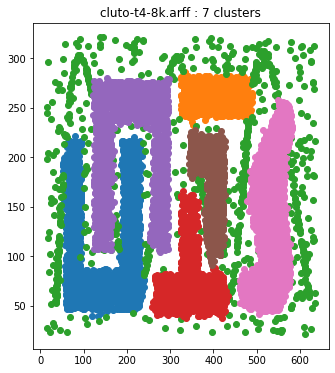

In [ ]:

color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

n=len(FILES)
n=n//3+1
i=1
nb=[]

fig=plt.figure(figsize=(18,6*n))

for f in FILES:
  ax=fig.add_subplot(n,3,i)
  i+=1

  lab={}
  for j in range(len(LABELS[f])):
      l=LABELS[f][j]
      if l not in lab:
          lab[l]=[[x_data[f][j]],[y_data[f][j]]]
      else:
          lab[l][0].append(x_data[f][j])
          lab[l][1].append(y_data[f][j])    
              
  k=0
  for lb in lab:
      ax.scatter(lab[lb][0],lab[lb][1],c=color[k%10])
      k+=1
  ax.set_title(f+" : "+str(len(lab))+" clusters")
plt.show()

4.2)

In [ ]:
FILES=['cluto-t4-8k.arff','2sp2glob.arff','ds4c2sc8.arff']
#CLUSTERS=[]
para=[[5.2,4],[1.5,10],[0.01,5]]
DATA={}
dbscan={}
LABELS={}
i=0
for f in FILES:
  DATA[f] = np.transpose(np.array([x_data[f],y_data[f]]))
  


  dbscan[f] = DBSCAN(eps=para[i][0],min_samples=para[i][1]).fit(DATA[f])
  i+=1
  LABELS[f]=dbscan[f].labels_



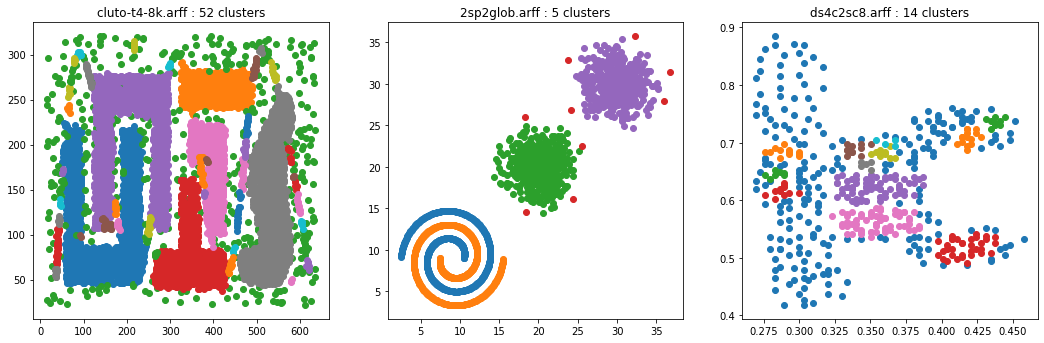

In [ ]:
color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

n=len(FILES)
n=n//3+1
i=1
nb=[]

fig=plt.figure(figsize=(18,6*n))

for f in FILES:
  ax=fig.add_subplot(n,3,i)
  i+=1

  lab={}
  for j in range(len(LABELS[f])):
      l=LABELS[f][j]
      if l not in lab:
          lab[l]=[[x_data[f][j]],[y_data[f][j]]]
      else:
          lab[l][0].append(x_data[f][j])
          lab[l][1].append(y_data[f][j])    
              
  k=0
  for lb in lab:
      ax.scatter(lab[lb][0],lab[lb][1],c=color[k%10])
      k+=1
  ax.set_title(f+" : "+str(len(lab))+" clusters")
plt.show()

# **5.Clustering HDBSCAN**

In [ ]:
FILES=['cluto-t4-8k.arff','2sp2glob.arff','ds4c2sc8.arff','compound.arff']
#CLUSTERS=[]
#para=[[5.2,4],[1.5,10]]
DATA={}
hdbscan_={}
LABELS={}
min = 10
i=0
for f in FILES:
  DATA[f] = np.transpose(np.array([x_data[f],y_data[f]]))
  hdbscan_[f] = hdbscan.HDBSCAN(min_cluster_size=min).fit(DATA[f])
  i+=1
  LABELS[f]=hdbscan_[f].labels_

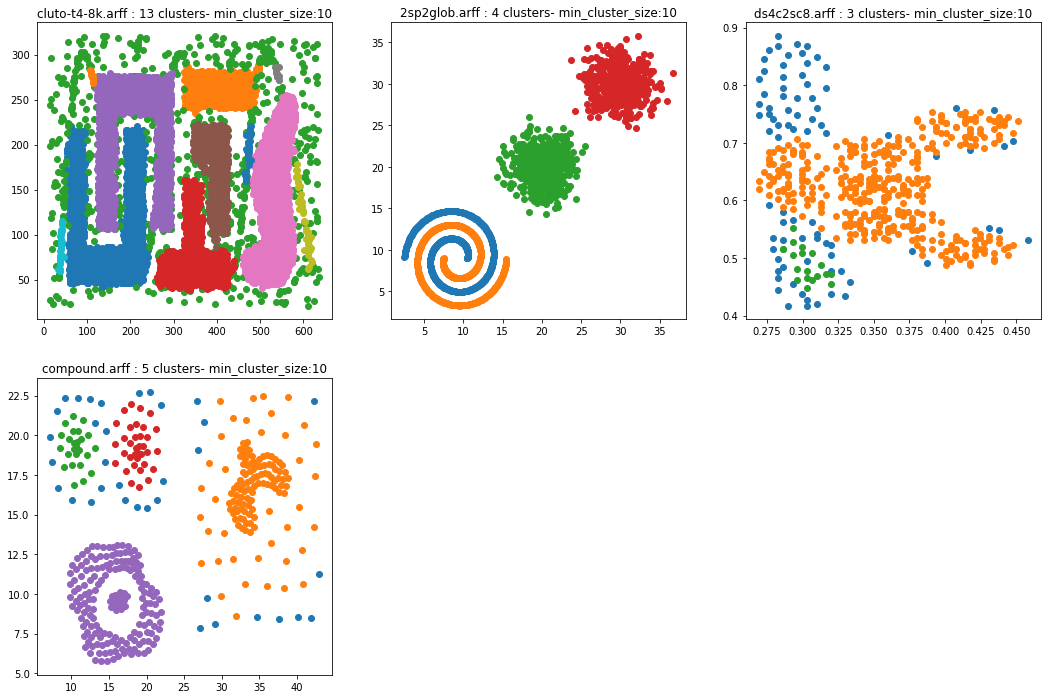

In [ ]:
color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

n=len(FILES)
n=n//3+1
i=1
nb=[]

fig=plt.figure(figsize=(18,6*n))

for f in FILES:
  ax=fig.add_subplot(n,3,i)
  i+=1

  lab={}
  for j in range(len(LABELS[f])):
      l=LABELS[f][j]
      if l not in lab:
          lab[l]=[[x_data[f][j]],[y_data[f][j]]]
      else:
          lab[l][0].append(x_data[f][j])
          lab[l][1].append(y_data[f][j])    
              
  k=0
  for lb in lab:
      ax.scatter(lab[lb][0],lab[lb][1],c=color[k%10])
      k+=1
  ax.set_title(f+" : "+str(len(lab))+" clusters" + " - min_cluster_size:" + str(min))
plt.show()

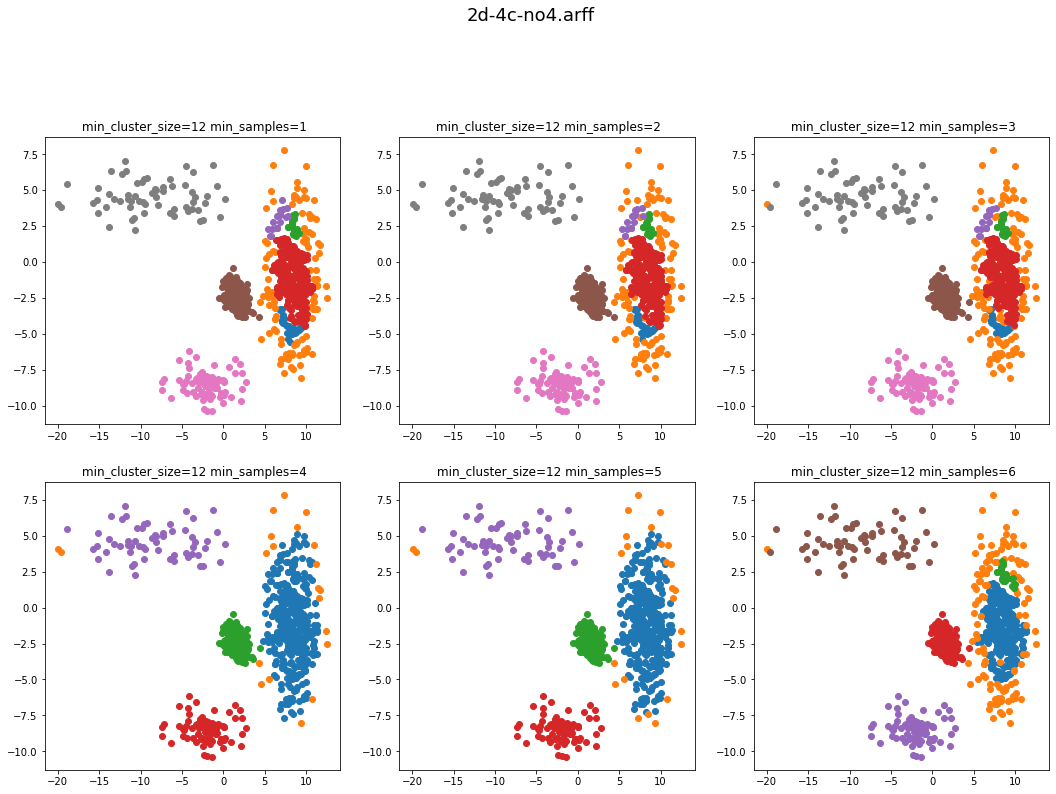

In [ ]:
#Fixer min_cluster_size
FILES=['2d-4c-no4.arff']
DATA={}
HD={}
LABELS={}
i=0
for f in FILES:
  DATA[f] = np.transpose(np.array([x_data[f],y_data[f]]))
  for s in range(1,7,1):
    HD[f+str(s)] = hdbscan.HDBSCAN(min_cluster_size=12, min_samples = s).fit(DATA[f])
    LABELS[f+str(s)] = HD[f+str(s)].labels_
  i+=1

color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

n=3
i=1
nb=[]

fig=plt.figure(figsize=(18,6*n))


for f in FILES:
  for s  in range(1,7,1):
    ax=fig.add_subplot(n,3,i)
    i+=1
    lab={}
    for j in range(len(LABELS[f+str(s)])):
        l=LABELS[f+str(s)][j]
        if l not in lab:
            lab[l]=[[x_data[f][j]],[y_data[f][j]]]
        else:
            lab[l][0].append(x_data[f][j])
            lab[l][1].append(y_data[f][j])    
                
    k=0
    for lb in lab:
        ax.scatter(lab[lb][0],lab[lb][1],c=color[k%10])
        k+=1
    ax.set_title(" min_cluster_size=12 min_samples="+str(s))
fig.suptitle('2d-4c-no4.arff', fontsize=18)
plt.show()

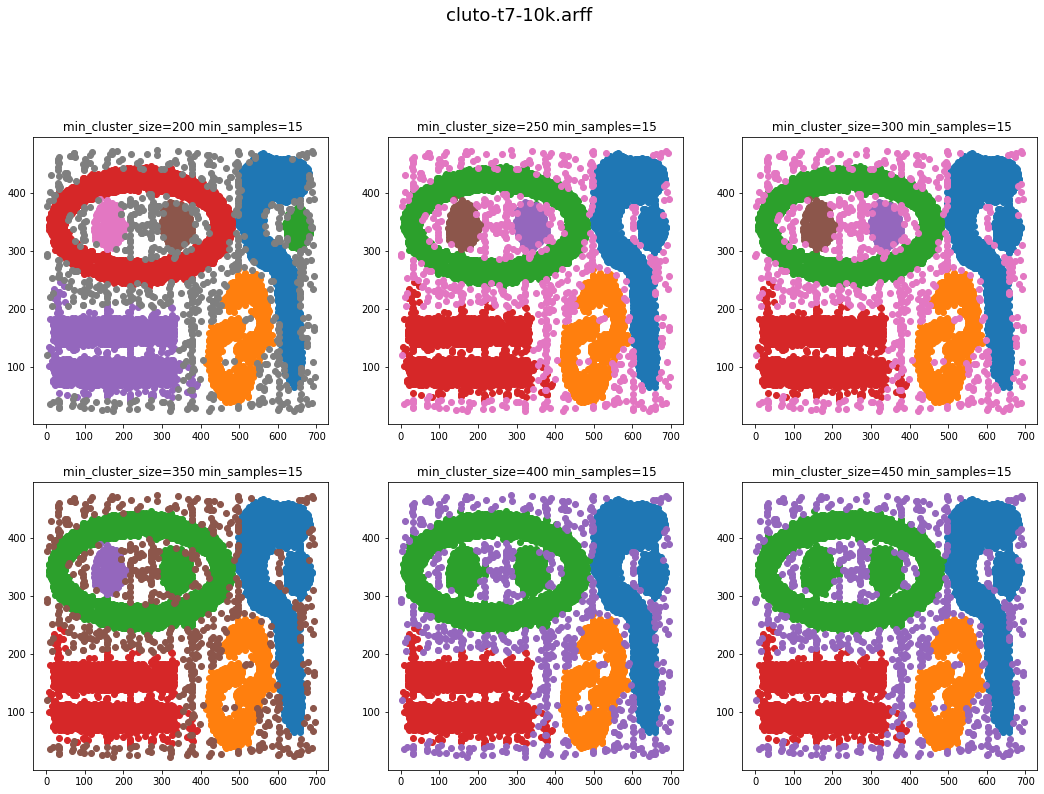

In [ ]:
#Fixer min_samples
FILES=['cluto-t7-10k.arff']
DATA={}
HD={}
LABELS={}
i=0
for f in FILES:
  DATA[f] = np.transpose(np.array([x_data[f],y_data[f]]))
  for s in range(200,500,50):
    HD[f+str(s)] = hdbscan.HDBSCAN(min_cluster_size=s, min_samples = 15).fit(DATA[f])
    LABELS[f+str(s)] = HD[f+str(s)].labels_
  i+=1

color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

n=3
i=1
nb=[]

fig=plt.figure(figsize=(18,6*n))


for f in FILES:
  for s  in range(200,500,50):
    ax=fig.add_subplot(n,3,i)
    i+=1
    lab={}
    for j in range(len(LABELS[f+str(s)])):
        l=LABELS[f+str(s)][j]
        if l not in lab:
            lab[l]=[[x_data[f][j]],[y_data[f][j]]]
        else:
            lab[l][0].append(x_data[f][j])
            lab[l][1].append(y_data[f][j])    
                
    k=0
    for lb in lab:
        ax.scatter(lab[lb][0],lab[lb][1],c=color[k%10])
        k+=1
    ax.set_title(" min_cluster_size="+ str(s) + " min_samples=15")
fig.suptitle('cluto-t7-10k.arff', fontsize=18)
plt.show()

# **6.Synthese**

In [5]:
! pwd

/content


In [2]:
#mettre les fichiers csv dans ./data

from pandas import read_csv
from os import listdir
path2="sample_data/data/"
#path2="data/"
files2=listdir(path2)

##remove not csv files
print("files2 before : "+str(files2))
for i in range(0,len(files2)):
  if files2[i][-4:]!=".csv":
    files2=files2[:i]+files2[i+1:]
    i-=1
print("files2 after : "+str(files2))

data2={}

for fi in files2:
  try:
    inter=read_csv(path2+fi)
    data2[fi]=np.array([inter["x"].values,inter["y"].values])
  except Exception as e:
    print("error for "+str(fi))
    print(e)

print(data2)

files2 before : ['x1.csv', 'x2.csv', 'x4.csv', 'y1.csv', 'x3.csv']
files2 after : ['x1.csv', 'x2.csv', 'x4.csv', 'y1.csv', 'x3.csv']
{'x1.csv': array([[664159, 665845, 597173, ..., 650661, 599647, 684091],
       [550946, 557965, 575538, ..., 861267, 858702, 842566]]), 'x2.csv': array([[845753, 812954, 868217, ..., 706472, 659128, 665898],
       [636607, 643720, 609046, ..., 171207, 142611,  98088]]), 'x4.csv': array([[624474, 673412, 647442, ..., 569266, 444587, 434041],
       [837604, 735362, 677000, ..., 738385, 878830, 814466]]), 'y1.csv': array([[4260.1, 4276.3, 4260.2, ..., 3259.6, 2688.7, 4095.2],
       [3476. , 3475.6, 3475.3, ..., 2970.7, 2958.6, 2344. ]]), 'x3.csv': array([[453320, 520651, 516664, ..., 351482, 341057, 374464],
       [606542, 594591, 660290, ..., 334662, 341338, 284441]])}


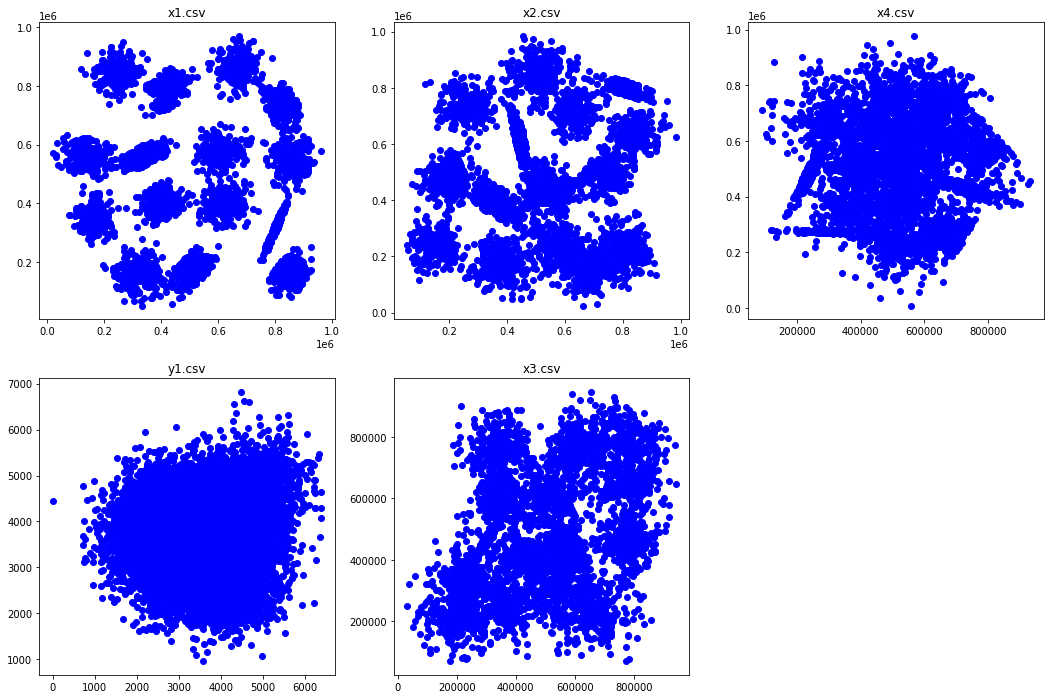

In [3]:
from matplotlib import pyplot as plt

n=len(files2)
n=n//3+1
i=1

fig=plt.figure(figsize=(18,6*n))

for f in files2:
  try:
    ax=fig.add_subplot(n,3,i)
    i+=1
    ax.scatter(data2[f][0],data2[f][1],c='b')
    ax.set_title(f)
  except:
    ax.set_title("error for "+str(f))
plt.show()

k-means

In [8]:
#on détermine le nombre de cluster
#davies_bouldin_score
from time import *
from sklearn import metrics


CLUSTER={}

for f in files2:
  try:
    DATA2=np.transpose(np.array([data2[f][0],data2[f][1]]))
    RES={}

    start=time()
    s=[]
    for k in range (2,21):
      kmeans2 = KMeans(n_clusters=k,init='k-means++').fit(DATA2)
      LABELS2=kmeans2.labels_
      s.append(metrics.davies_bouldin_score(DATA2, LABELS2))
      #print(s)

    end=time()
    CLUSTER[f]=s.index(min(s))+2
  except:
    print("error for "+str(f))
print(CLUSTER)

{'x1.csv': 15, 'x2.csv': 15, 'x4.csv': 14, 'y1.csv': 9, 'x3.csv': 15}


In [9]:
#files2
#CLUSTERS
DATA={}
kmeans={}
LABELS={}
i=0
for f in files2:
  try:
    DATA[f] = np.transpose(np.array([data2[f][0],data2[f][1]]))
    


    kmeans[f] = KMeans(n_clusters=CLUSTER[f],init='k-means++').fit(DATA[f])
    i+=1
    LABELS[f]=kmeans[f].labels_
  except:
    print("error for "+str(f))

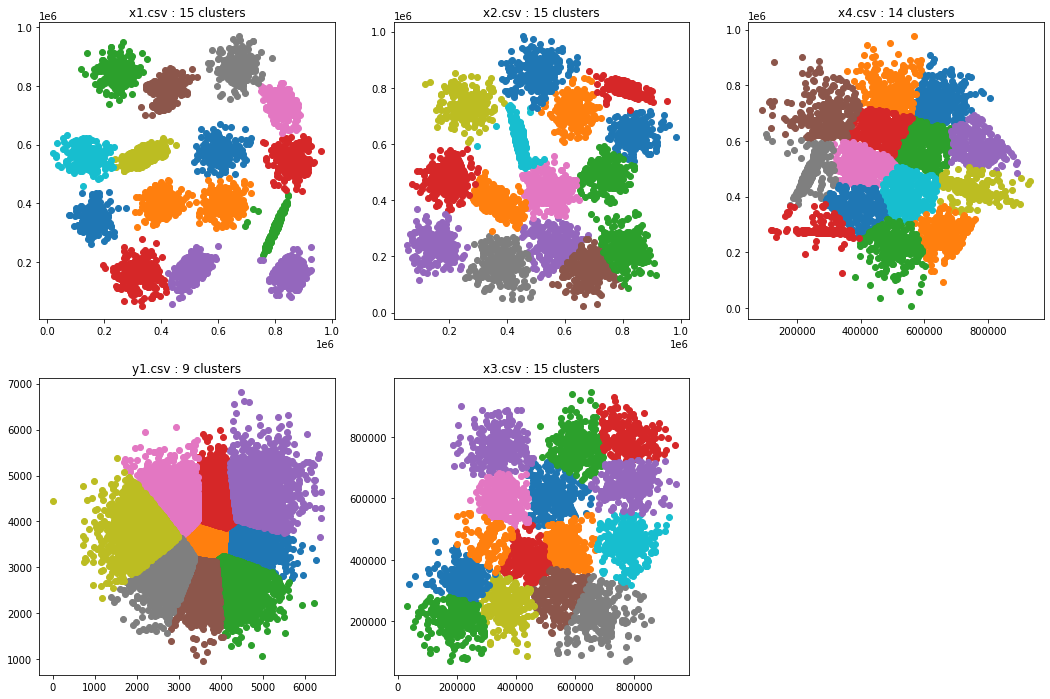

In [10]:

color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

n=len(files2)
n=n//3+1
i=1
nb=[]

fig=plt.figure(figsize=(18,6*n))

for f in files2:
  ax=fig.add_subplot(n,3,i)
  i+=1

  lab={}
  for j in range(len(LABELS[f])):
      l=LABELS[f][j]
      if l not in lab:
          lab[l]=[[data2[f][0][j]],[data2[f][1][j]]]
      else:
          lab[l][0].append(data2[f][0][j])
          lab[l][1].append(data2[f][1][j])    
              
  k=0
  for lb in lab:
      ax.scatter(lab[lb][0],lab[lb][1],c=color[k%10])
      k+=1
  ax.set_title(f+" : "+str(len(lab))+" clusters")
plt.show()

Agglomératif


In [6]:
#on détermine le nombre de cluster et le linkage
#davies_bouldin_score
from sklearn import metrics
link=['single','complete','average','ward']

CLUSTER={}

for f in files2:
  if(f != "y1.csv"): #PAS ASSEZ DE RAM POUR y1
    try:
      DATA2=np.transpose(np.array([data2[f][0],data2[f][1]]))

      min=999
      for k in range (2,21):
        for l in link:
          ac2 = AgglomerativeClustering(n_clusters=k,linkage=l,affinity='euclidean').fit(DATA2)
          LABELS2=ac2.labels_
          s=metrics.davies_bouldin_score(DATA2, LABELS2)
          if s<min:
            min=s
            c_l=[k,l]

      CLUSTER[f]=c_l
    except:
      print("error for "+str(f))
print(CLUSTER)

#PLANTE AVEC UNE ERREUR BIZARRE : PLUS DE MEMOIRE RAM

{'x1.csv': [17, 'average'], 'x2.csv': [16, 'average'], 'x4.csv': [2, 'single'], 'x3.csv': [2, 'single']}


In [8]:

DATA={}
ac={}
LABELS={}
i=0
for f in files2:
  if (f != "y1.csv"): #PAS ASSEZ DE RAM POUR y1
    try:
      DATA[f] = np.transpose(np.array([data2[f][0],data2[f][1]]))
      


      ac[f] = AgglomerativeClustering(n_clusters=CLUSTER[f][0],linkage=CLUSTER[f][1],affinity='euclidean').fit(DATA[f])
      i+=1
      LABELS[f]=ac[f].labels_
    except:
      print("error for "+str(f))

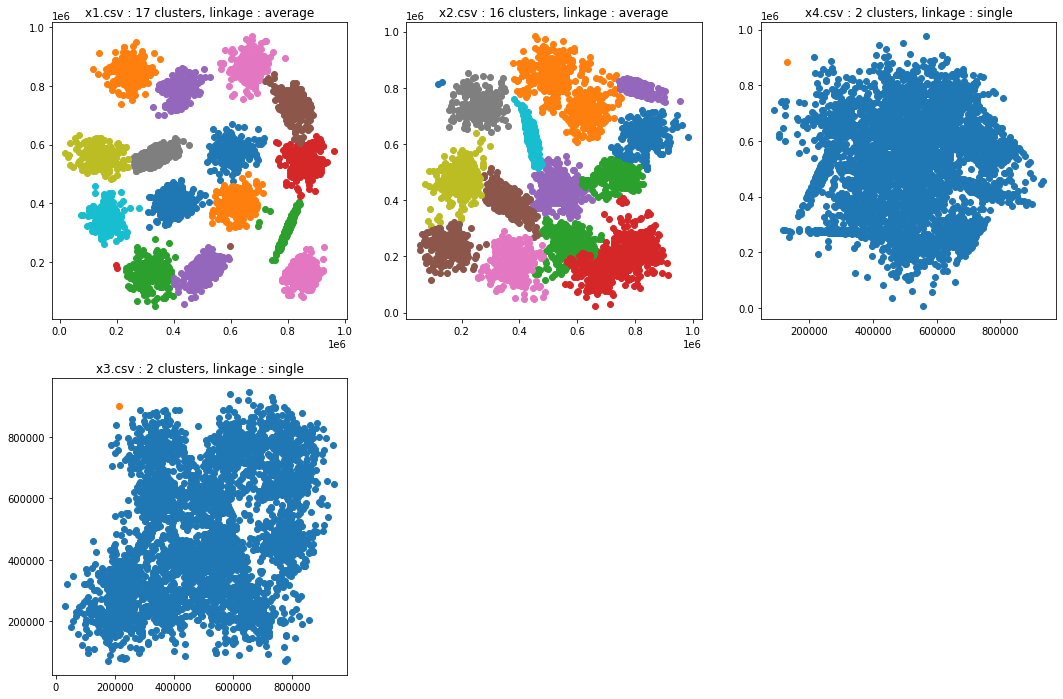

In [9]:
color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

n=len(files2)-1 # -y1
n=n//3+1
i=1
nb=[]

fig=plt.figure(figsize=(18,6*n))

for f in files2:
  if (f != "y1.csv"): #PAS ASSEZ DE RAM POUR y1
    ax=fig.add_subplot(n,3,i)
    i+=1

    lab={}
    for j in range(len(LABELS[f])):
        l=LABELS[f][j]
        if l not in lab:
            lab[l]=[[data2[f][0][j]],[data2[f][1][j]]]
        else:
            lab[l][0].append(data2[f][0][j])
            lab[l][1].append(data2[f][1][j])    
                
    k=0
    for lb in lab:
        ax.scatter(lab[lb][0],lab[lb][1],c=color[k%10])
        k+=1
    ax.set_title(f+" : "+str(len(lab))+" clusters, linkage : "+str(CLUSTER[f][1]))
plt.show()

In [47]:
DATA={}
ac={}
LABELS={}
i=0
for f in ["x3.csv","x4.csv"]:

  try:
    DATA[f] = np.transpose(np.array([data2[f][0],data2[f][1]]))
    
    ac[f] = AgglomerativeClustering(n_clusters=500,linkage='single',affinity='euclidean').fit(DATA[f])
    i+=1
    LABELS[f]=ac[f].labels_
  except:
    print("error for "+str(f))

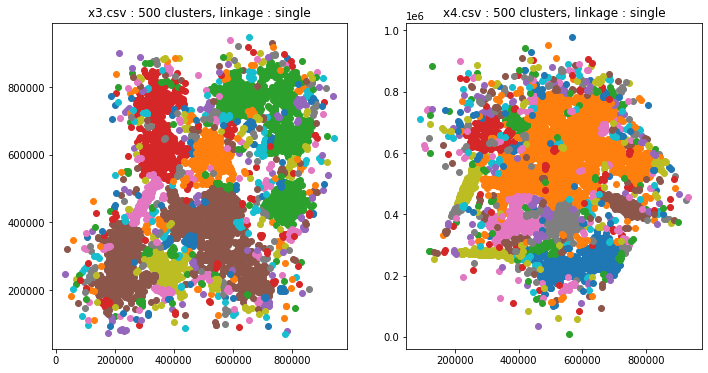

In [48]:
color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

n=len(["x3.csv","x4.csv"])
n=n//3+1
i=1
nb=[]

fig=plt.figure(figsize=(18,6*n))

for f in ["x3.csv","x4.csv"]:

  ax=fig.add_subplot(n,3,i)
  i+=1

  lab={}
  for j in range(len(LABELS[f])):
      l=LABELS[f][j]
      if l not in lab:
          lab[l]=[[data2[f][0][j]],[data2[f][1][j]]]
      else:
          lab[l][0].append(data2[f][0][j])
          lab[l][1].append(data2[f][1][j])    
              
  k=0
  for lb in lab:
      ax.scatter(lab[lb][0],lab[lb][1],c=color[k%10])
      k+=1
  ax.set_title(f+" : "+str(len(lab))+" clusters, linkage : "+str(CLUSTER[f][1]))
plt.show()

DBSCAN

In [25]:
np.linspace(10,1000,100)

array([  10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,   90.,
        100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,  180.,
        190.,  200.,  210.,  220.,  230.,  240.,  250.,  260.,  270.,
        280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.,  360.,
        370.,  380.,  390.,  400.,  410.,  420.,  430.,  440.,  450.,
        460.,  470.,  480.,  490.,  500.,  510.,  520.,  530.,  540.,
        550.,  560.,  570.,  580.,  590.,  600.,  610.,  620.,  630.,
        640.,  650.,  660.,  670.,  680.,  690.,  700.,  710.,  720.,
        730.,  740.,  750.,  760.,  770.,  780.,  790.,  800.,  810.,
        820.,  830.,  840.,  850.,  860.,  870.,  880.,  890.,  900.,
        910.,  920.,  930.,  940.,  950.,  960.,  970.,  980.,  990.,
       1000.])

In [ ]:
#on détermine eps et min_samples
# !! TROP LONG !!
#davies_bouldin_score
from sklearn import metrics
eps_range={}
min_sample_range={}
eps_range["x1.csv"]=np.linspace(0.001e6,0.2e6,200)
min_sample_range["x1.csv"]=np.linspace(1,20,20)
eps_range["x2.csv"]=np.linspace(0.001e6,0.2e6,200)
min_sample_range["x2.csv"]=np.linspace(1,20,20)
eps_range["x3.csv"]=np.linspace(1000,200000,200)
min_sample_range["x3.csv"]=np.linspace(1,20,20)
eps_range["x4.csv"]=np.linspace(0.001e6,0.2e6,200)
min_sample_range["x4.csv"]=np.linspace(1,20,20)
eps_range["y1.csv"]=np.linspace(10,1000,100)
min_sample_range["y1.csv"]=np.linspace(1,20,20)

para={}

for f in files2:
  
  try:
    DATA2=np.transpose(np.array([data2[f][0],data2[f][1]]))

    min=999
    for e in eps_range[f]:
      for m in min_sample_range[f]:
        db = DBSCAN(eps=e,min_samples=m).fit(DATA2)
        LABELS2=db.labels_
        s=metrics.davies_bouldin_score(DATA2, LABELS2)
        if s < min :
          min = s
          para[f]=[e,m]

    
  except:
    print("error for "+str(f))

print(para)


In [96]:
para={}
para["x1.csv"]=[0.03e6,20]
para["x2.csv"]=[0.02e6,9]
para["x3.csv"]=[15000,10]
para["x4.csv"]=[0.02e6,22]
para["y1.csv"]=[0.05e4,5]

In [97]:

DATA={}
dbscan3={}
LABELS={}
i=0
for f in files2:
  if (f != "y1.csv"):
    try:
      DATA[f] = np.transpose(np.array([data2[f][0],data2[f][1]]))
      


      dbscan3[f] = DBSCAN(eps=para[f][0],min_samples=para[f][1]).fit(DATA[f])
      i+=1
      LABELS[f]=dbscan3[f].labels_
    except:
      print("error for "+str(f))

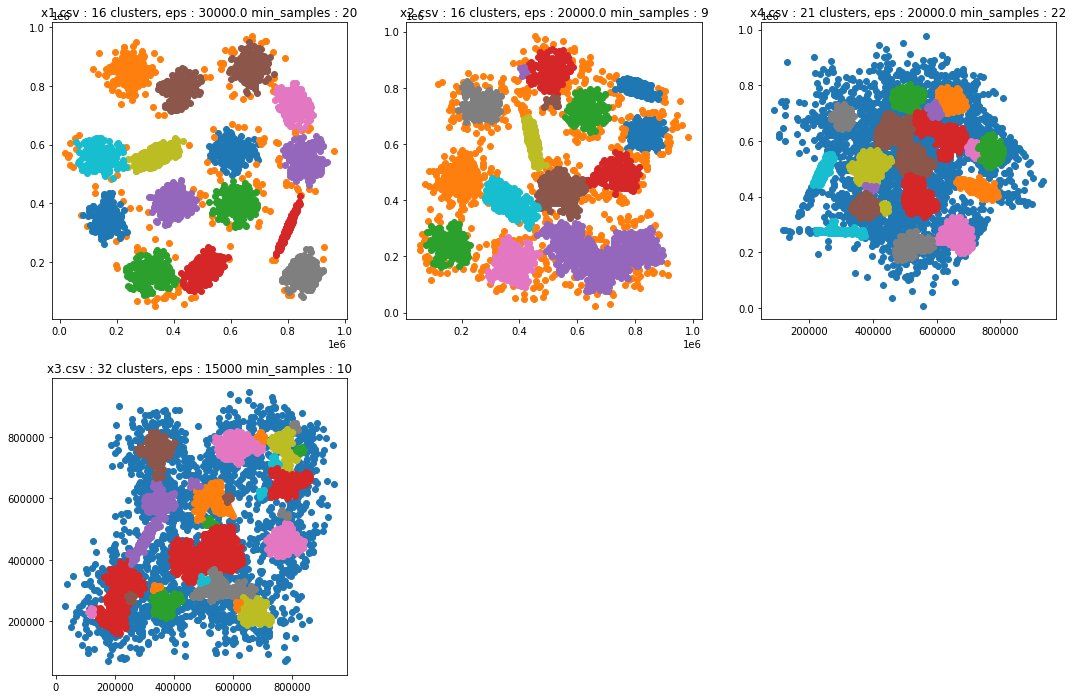

In [98]:
color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

n=len(files2)-1
n=n//3+1
i=1
nb=[]

fig=plt.figure(figsize=(18,6*n))

for f in files2:
  if (f != "y1.csv"):

    ax=fig.add_subplot(n,3,i)
    i+=1

    lab={}
    for j in range(len(LABELS[f])):
        l=LABELS[f][j]
        if l not in lab:
            lab[l]=[[data2[f][0][j]],[data2[f][1][j]]]
        else:
            lab[l][0].append(data2[f][0][j])
            lab[l][1].append(data2[f][1][j])    
                
    k=0
    for lb in lab:
        ax.scatter(lab[lb][0],lab[lb][1],c=color[k%10])
        k+=1
    ax.set_title(f+" : "+str(len(lab))+" clusters, eps : "+str(para[f][0])+" min_samples : "+str(para[f][1]))
plt.show()

hdbscan

In [185]:
para={}
para["x1.csv"]=100
para["x2.csv"]=120
para["x3.csv"]=143
para["x4.csv"]=100
para["y1.csv"]=64

In [186]:
DATA={}
hdbscan3={}
LABELS={}
i=0
for f in files2:
  #if (f != "y1.csv"):
    try:
      DATA[f] = np.transpose(np.array([data2[f][0],data2[f][1]]))
      


      hdbscan3[f] = hdbscan.HDBSCAN(min_cluster_size=para[f]).fit(DATA[f])
      i+=1
      LABELS[f]=hdbscan3[f].labels_
    except:
      print("error for "+str(f))

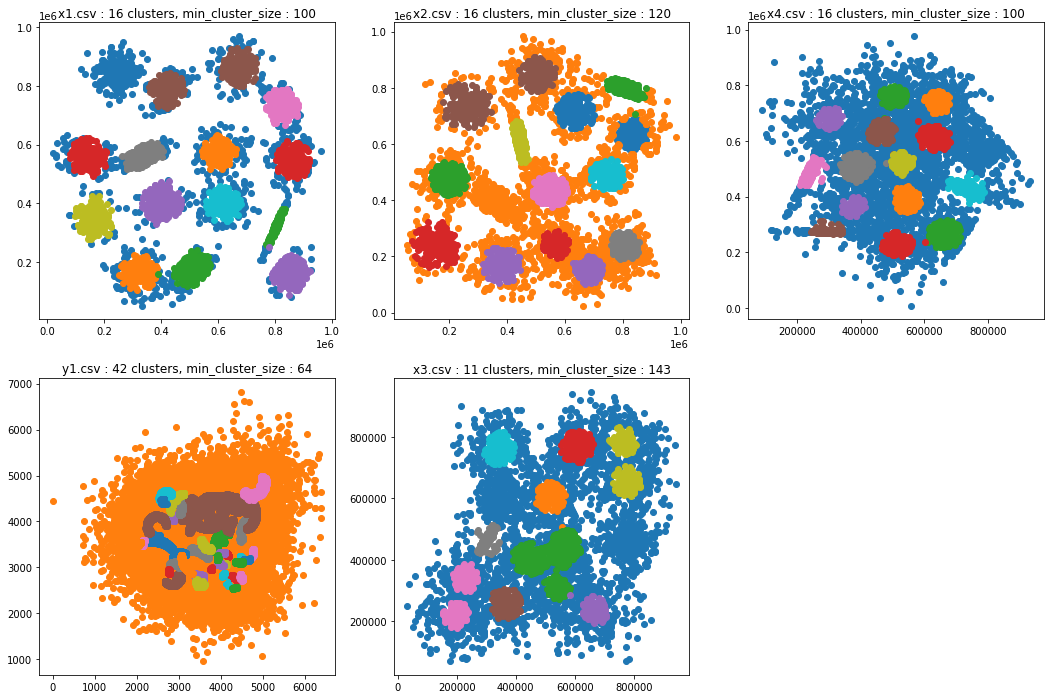

In [187]:
color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

n=len(files2)
n=n//3+1
i=1
nb=[]

fig=plt.figure(figsize=(18,6*n))

for f in files2:
  #if (f != "y1.csv"):

    ax=fig.add_subplot(n,3,i)
    i+=1

    lab={}
    for j in range(len(LABELS[f])):
        l=LABELS[f][j]
        if l not in lab:
            lab[l]=[[data2[f][0][j]],[data2[f][1][j]]]
        else:
            lab[l][0].append(data2[f][0][j])
            lab[l][1].append(data2[f][1][j])    
                
    k=0
    for lb in lab:
        ax.scatter(lab[lb][0],lab[lb][1],c=color[k%10])
        k+=1
    ax.set_title(f+" : "+str(len(lab))+" clusters, min_cluster_size : "+str(para[f]))
plt.show()